In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error 

In [2]:
sys.path.insert(1, '/home/ujwal/ML_program/Trading_financial_market/Predicting_AUDUSD_Using_Major_Regression_Models')
from ipynb.fs.defs.Data_preprocessing import sampling_multi_target


In [3]:
n_steps_back = 60
n_steps_future=10

train_X, train_Y, val_X, val_Y, test_X, test_Y,  = sampling_multi_target(n_steps_back, n_steps_future)

In [4]:
train_X.shape

(92464, 60)

In [5]:
train_Y.shape

(92464, 10)

In [16]:
# cheking time required for training and its MAE value
import numpy as np
XGBModel = XGBRegressor(n_jobs=-1)
XGBModel.fit(X=train_X, y=train_Y, eval_set=[(val_X,val_Y)])


#test data
preds = XGBModel.predict(test_X)
MAE_t = mean_absolute_error(test_Y, preds)

#val data
preds_val = XGBModel.predict(val_X)
MAE_v = mean_absolute_error(val_Y, preds_val)

print(MAE_t, MAE_v)

[0]	validation_0-rmse:0.14246
[1]	validation_0-rmse:0.09965
[2]	validation_0-rmse:0.06976
[3]	validation_0-rmse:0.04882
[4]	validation_0-rmse:0.03421
[5]	validation_0-rmse:0.02402
[6]	validation_0-rmse:0.01696
[7]	validation_0-rmse:0.01217
[8]	validation_0-rmse:0.00900
[9]	validation_0-rmse:0.00699
[10]	validation_0-rmse:0.00584
[11]	validation_0-rmse:0.00529
[12]	validation_0-rmse:0.00504
[13]	validation_0-rmse:0.00497
[14]	validation_0-rmse:0.00496
[15]	validation_0-rmse:0.00501
[16]	validation_0-rmse:0.00509
[17]	validation_0-rmse:0.00508
[18]	validation_0-rmse:0.00512
[19]	validation_0-rmse:0.00520
[20]	validation_0-rmse:0.00523
[21]	validation_0-rmse:0.00526
[22]	validation_0-rmse:0.00526
[23]	validation_0-rmse:0.00529
[24]	validation_0-rmse:0.00532
[25]	validation_0-rmse:0.00537
[26]	validation_0-rmse:0.00537
[27]	validation_0-rmse:0.00535
[28]	validation_0-rmse:0.00535
[29]	validation_0-rmse:0.00537
[30]	validation_0-rmse:0.00536
[31]	validation_0-rmse:0.00536
[32]	validation_0-

In [20]:
# Unused test dataset
print("Test data")
print("MAE=", MAE_t, "\n")

# val dataset
print("Val data")
print("MAE=", MAE_v)

Test data
MAE= 0.0014803314235120675 

Val data
MAE= 0.0021010588275864215


Text(0, 0.5, 'Predicted Y')

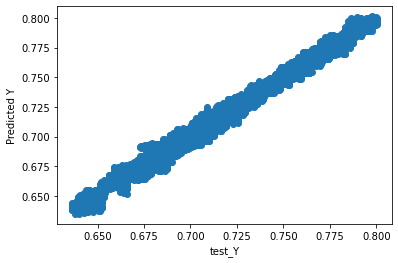

In [27]:
import matplotlib.pyplot as plt
plt.scatter(test_Y,preds)
plt.xlabel('test_Y')
plt.ylabel('Predicted Y')

In [28]:
# Check mse using Linear regression
from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(test_Y,preds))
print('MSE :'," ", metrics.mean_squared_error(test_Y,preds))
print('RMSE :'," ", np.sqrt(metrics.mean_squared_error(test_Y,preds)))

MAE :   0.0014803314235120675
MSE :   4.6305934850109896e-06
RMSE :   0.002151881382653558


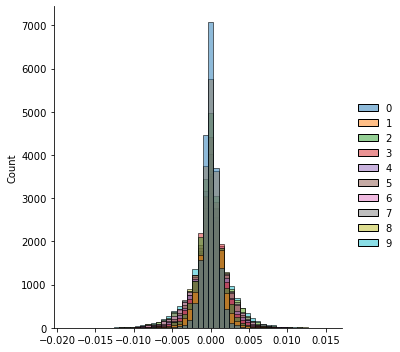

In [34]:
sns.displot(test_Y - preds, bins=50)

In [35]:
# save model using pickle
import pickle
pickle.dump(XGBModel, open('XGBRegressor.pkl', 'wb'))

In [36]:
# loading model
import pickle

XGBRegressor_model = pickle.load(open('XGBRegressor.pkl', 'rb'))

In [37]:
forecast_data = test_X[-1].reshape(1,-1)
forecast = XGBRegressor_model.predict(forecast_data)
forecast

array([[0.6400679 , 0.6400936 , 0.640627  , 0.6406724 , 0.641031  ,
        0.64029986, 0.6408388 , 0.64058506, 0.641268  , 0.64054114]],
      dtype=float32)

In [38]:
# Check mse using Linear regression
from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(test_Y[-1],forecast[0]))
print('MSE :'," ", metrics.mean_squared_error(test_Y[-1],forecast[0]))
print('RMSE :'," ", np.sqrt(metrics.mean_squared_error(test_Y[-1],forecast[0])))

MAE :   0.00043218136978151467
MSE :   2.715733288009946e-07
RMSE :   0.0005211269795366524
